In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Load raw data
data source: https://console.treasuredata.com/app/jobs/1256484155/results


In [2]:
df = pd.read_csv(\
'/Volumes/GoogleDrive/My Drive/wish_local/dsf1662_reestimate_profit_of_1152_channel_for_fusion_in_us/1256484155.csv')

In [3]:
df = df.drop(columns=['purchase_logistics_fee_lm_1152','purchase_logistics_fee_lm_newtd'])

In [4]:
df.shape

(141183, 13)

In [5]:
df.head()

,store_id,epc_combined_date,order_channel_post,fm_count,lm_count,gmv,weight,num_mids,sales_fm,purchase_fm,purchase_logistics_fee_lm_previous,purchase_other_fees_lm_previous,logistics_profit_cny_previous
0,6078cd85dd151d510a5ea03a,2021-11-19,1150,5,1,60.300002,0.483,5,103.74,11.91,68.55,0.0,23.28
1,60b160ce5771d5877a40d1f6,2021-09-16,2001,11,1,89.129999,0.768,11,174.45,23.55,95.26,0.0,55.64
2,60b54f71c0ecacb6fdce9d90,2021-11-07,2001,11,1,129.128411,0.708,11,183.00,22.95,113.04,0.0,47.01
3,5d893e9f8db50e220f2623a5,2021-11-02,1150,11,1,96.450001,0.952,13,182.15,24.06,110.06,0.0,48.03
4,5f4278dda1ec697036e0046b,2021-10-14,1150,8,1,49.619999,0.573,8,130.28,17.09,72.65,0.0,40.54


In [6]:
df['epc_combined_date'].max()

'2021-11-30'

##### There is no recombined package weighted > 30 kg, so ignore the potential issue that the recombined package will exceed 30kg

In [7]:
df[df['weight']>=30]

,store_id,epc_combined_date,order_channel_post,fm_count,lm_count,gmv,weight,num_mids,sales_fm,purchase_fm,purchase_logistics_fee_lm_previous,purchase_other_fees_lm_previous,logistics_profit_cny_previous


In [8]:
df = df[df['weight']<=30]

In [9]:
df[(df['weight']<0.05) & (df['order_channel_post']==2001)]

,store_id,epc_combined_date,order_channel_post,fm_count,lm_count,gmv,weight,num_mids,sales_fm,purchase_fm,purchase_logistics_fee_lm_previous,purchase_other_fees_lm_previous,logistics_profit_cny_previous
22,5fd97c3978882a2d6d4d90c5,2021-11-18,2001,1,1,3.96,0.032,1,7.30,1.93,24.75,0.0,-19.38
34,5d6e91c375fc215e2f3c41e3,2021-09-01,2001,1,1,2.40,0.045,1,12.62,2.01,23.15,0.0,-12.54
354,6128ee800dffefb9de4a3339,2021-09-07,2001,1,1,2.90,0.040,1,11.36,1.98,23.15,0.0,-13.77
454,612b01e5b161bc595fd450d9,2021-09-14,2001,1,1,1.80,0.031,1,10.66,1.96,23.15,0.0,-14.45
615,613a8182af2e81163b675baa,2021-09-17,2001,1,1,1.80,0.032,1,10.88,2.36,23.15,0.0,-14.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139941,5dfaa4c78b5af030054eef52,2021-09-11,2001,3,1,9.73,0.033,3,19.90,5.78,23.15,0.0,-9.03
140322,5e33392d8f069e29c08e72c7,2021-10-03,2001,1,1,12.60,0.045,1,18.87,2.00,24.75,0.0,-7.88
140464,5f47ef85b6a804da5975e440,2021-09-30,2001,1,1,1.80,0.022,1,9.57,2.40,24.75,0.0,-17.58
140941,60d3d943dcc94c1ddd86bf19,2021-11-15,2001,1,1,4.66,0.039,1,10.52,1.96,24.75,0.0,-16.19


In [10]:
df['weight'].describe(percentiles=[0.25, .5, .75, .9, .95, .99])

count    141183.000000
mean          1.029739
std           1.046247
min           0.006000
25%           0.280000
50%           0.769000
75%           1.447000
90%           2.256000
95%           2.983000
99%           4.925540
max          21.801815
Name: weight, dtype: float64

# Price card
data source: https://docs.google.com/spreadsheets/d/1LARnTsAEwboH3N-xSIg95jhVz-KZ2QLq4YCARYV1fHQ/edit#gid=1255840789&range=A1 

In [11]:
# 2022-01 price
text="""
1152	0	0.03	20.16	122	|
1152	0.03	0.141	18.59	122	|
1152	0.141	0.453	17.54	122	|
1152	0.453	1	27.41	120	|
1152	1	10	24.26	117	|
1152	10	30	34.76	117	|
1150	0	0.03	19.5	115	|
1150	0.03	0.141	18.59	112	|
1150	0.141	0.34	17.54	111	|
1150	0.34	0.453	19.5	111	|
1150	0.453	0.7	21.5	115	|
1150	0.7	1.3	15.5	115	|
1150	1.3	10	16.5	103	|
2001	0	0.05	24.75	0	|
2001	0.05	0.45	19	115	|
2001	0.45	0.8	21	130	|
2001	0.8	2.25	20	115	|
2001	2.25	30	10	98
"""

a = pd.DataFrame(text.split('|')).applymap(lambda x: x.split())
a['channel'] = a[0].apply(lambda x: x[0])
a['min_weight'] = a[0].apply(lambda x: x[1]).astype(float)
a['max_weight'] = a[0].apply(lambda x: x[2]).astype(float)
a['item_fee'] = a[0].apply(lambda x: x[3]).astype(float)
a['kg_fee'] = a[0].apply(lambda x: x[4]).astype(float)

price_card = a.set_index(['channel', 'min_weight', 'max_weight'])[['item_fee', 'kg_fee']].T.to_dict()
price_card

{('1152', 0.0, 0.03): {'item_fee': 20.16, 'kg_fee': 122.0},
 ('1152', 0.03, 0.141): {'item_fee': 18.59, 'kg_fee': 122.0},
 ('1152', 0.141, 0.453): {'item_fee': 17.54, 'kg_fee': 122.0},
 ('1152', 0.453, 1.0): {'item_fee': 27.41, 'kg_fee': 120.0},
 ('1152', 1.0, 10.0): {'item_fee': 24.26, 'kg_fee': 117.0},
 ('1152', 10.0, 30.0): {'item_fee': 34.76, 'kg_fee': 117.0},
 ('1150', 0.0, 0.03): {'item_fee': 19.5, 'kg_fee': 115.0},
 ('1150', 0.03, 0.141): {'item_fee': 18.59, 'kg_fee': 112.0},
 ('1150', 0.141, 0.34): {'item_fee': 17.54, 'kg_fee': 111.0},
 ('1150', 0.34, 0.453): {'item_fee': 19.5, 'kg_fee': 111.0},
 ('1150', 0.453, 0.7): {'item_fee': 21.5, 'kg_fee': 115.0},
 ('1150', 0.7, 1.3): {'item_fee': 15.5, 'kg_fee': 115.0},
 ('1150', 1.3, 10.0): {'item_fee': 16.5, 'kg_fee': 103.0},
 ('2001', 0.0, 0.05): {'item_fee': 24.75, 'kg_fee': 0.0},
 ('2001', 0.05, 0.45): {'item_fee': 19.0, 'kg_fee': 115.0},
 ('2001', 0.45, 0.8): {'item_fee': 21.0, 'kg_fee': 130.0},
 ('2001', 0.8, 2.25): {'item_fee': 

In [12]:
def calculate_price(w, channel, price_card):
    for k, v in price_card.items():
        if (channel == k[0]) and (w>k[1]) and (w<k[2]):
            return v['item_fee'] + w*v['kg_fee']
        if (channel == k[0]) and (w==k[1]):
            return v['item_fee'] + w*v['kg_fee']
    return 

In [13]:
channels = {}

for c in ['1150', '1152', '2001']:
    channels[c] = {}
    for w in np.arange(0, 30.01, 0.01):
        channels[c][round(w,2)] = calculate_price(w, c, price_card)
        
price_card_detail = pd.DataFrame(channels)

price_card_detail['1152_1150_ratio'] = price_card_detail['1152'] / price_card_detail['1150']
# price_card_detail['NewTD_1150_ratio'] = price_card_detail['NewTD'] / price_card_detail['1150']
# price_card_detail['NewTD_2001_ratio'] = price_card_detail['NewTD'] / price_card_detail['2001']

In [14]:
price_card_detail

,1150,1152,2001,1152_1150_ratio
0.00,19.50,20.16,24.75,1.033846
0.01,20.65,21.38,24.75,1.035351
0.02,21.80,22.60,24.75,1.036697
0.03,21.95,22.25,24.75,1.013667
0.04,23.07,23.47,24.75,1.017339
...,...,...,...,...
29.96,NaN,3540.08,2946.08,NaN
29.97,NaN,3541.25,2947.06,NaN
29.98,NaN,3542.42,2948.04,NaN
29.99,NaN,3543.59,2949.02,NaN


<AxesSubplot:>

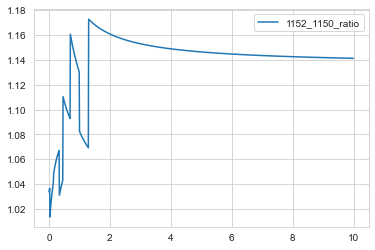

In [15]:
price_card_detail[['1152_1150_ratio']].plot()

# Volumetric card
data source:https://docs.google.com/spreadsheets/d/1LARnTsAEwboH3N-xSIg95jhVz-KZ2QLq4YCARYV1fHQ/edit#gid=1060545710&range=A1

In [16]:
volumetric_text = """
1.6	0.0520	5.5	|
1.6	0.0127	9	|
1.7	0.0679	5.5	|
1.7	0.0181	9	|
1.8	0.0944	5.5	|
1.8	0.0272	9	|
1.9	0.1162	5.5	|
1.9	0.0349	9	|
2	0.1485	5.5	|
2	0.0441	9	|
2.1	0.1896	5.5	|
2.1	0.0592	9	|
2.2	0.2151	5.5	|
2.2	0.0633	9	|
2.3	0.2534	5.5	|
2.3	0.0872	9	|
2.4	0.2841	5.5	|
2.4	0.1062	9	|
2.5	0.3224	5.5	|
2.5	0.1185	9	|
2.6	0.3484	5.5	|
2.6	0.1441	9	|
2.7	0.3743	5.5	|
2.7	0.1774	9	|
2.8	0.4126	5.5	|
2.8	0.2085	9	|
2.9	0.4233	5.5	|
2.9	0.2273	9	|
3	0.4449	5.5	|
3	0.2430	9	|
3.1	0.4692	5.5	|
3.1	0.2595	9	|
3.2	0.4584	5.5	|
3.2	0.2964	9	|
3.3	0.4594	5.5	|
3.3	0.3384	9	|
3.4	0.4753	5.5	|
3.4	0.3519	9	|
3.5	0.4638	5.5	|
3.5	0.3989	9	|
3.6	0.4457	5.5	|
3.6	0.4199	9	|
3.7	0.4452	5.5	|
3.7	0.4533	9	|
3.8	0.4337	5.5	|
3.8	0.4760	9	|
3.9	0.4246	5.5	|
3.9	0.4904	9	|
4	0.4129	5.5	|
4	0.5171	9	|
4.1	0.3893	5.5	|
4.1	0.5544	9	|
4.2	0.3707	5.5	|
4.2	0.5782	9	|
4.3	0.3194	5.5	|
4.3	0.6336	9	|
4.4	0.3228	5.5	|
4.4	0.6338	9	|
4.5	0.2647	5.5	|
4.5	0.6946	9	|
4.6	0.2528	5.5	|
4.6	0.7209	9	|
4.7	0.2033	5.5	|
4.7	0.7716	9	|
4.8	0.2144	5.5	|
4.8	0.7559	9	|
4.9	0.2116	5.5	|
4.9	0.7570	9	|
5	0.1606	5.5	|
5	0.7958	9	|
5.1	0.1640	5.5	|
5.1	0.8142	9	|
5.2	0.1680	5.5	|
5.2	0.8105	9	|
5.3	0.1244	5.5	|
5.3	0.8502	9	|
5.4	0.1068	5.5	|
5.4	0.8594	9	|
5.5	0.1306	5.5	|
5.5	0.8480	9	|
5.6	0.0919	5.5	|
5.6	0.8830	9	|
5.7	0.0808	5.5	|
5.7	0.9102	9	|
5.8	0.0993	5.5	|
5.8	0.8801	9	|
5.9	0.0635	5.5	|
5.9	0.9030	9	|
6	0.0985	5.5	|
6	0.8826	9	|
6.1	0.0435	5.5	|
6.1	0.9130	9	|
6.2	0.0413	5.5	|
6.2	0.9220	9	|
6.3	0.0594	5.5	|
6.3	0.9158	9	|
6.4	0.0385	5.5	|
6.4	0.9341	9	|
6.5	0.0503	5.5	|
6.5	0.9245	9	|
6.6	0.0305	5.5	|
6.6	0.9268	9	|
6.7	0.0484	5.5	|
6.7	0.9194	9	|
6.8	0.0420	5.5	|
6.8	0.9244	9	|
6.9	0.0407	5.5	|
6.9	0.9187	9	|
7	0.0083	5.5	|
7	0.9500	9	|
7.1	0.0196	5.5	|
7.1	0.9706	9	|
7.2	0.0139	5.5	|
7.2	0.9306	9	|
7.3	0.0482	5.5	|
7.3	0.8795	9	|
7.4	0.9747	9	|
7.5	0.9434	9	|
7.6	0.0469	5.5	|
7.6	0.9063	9	|
7.7	0.0217	5.5	|
7.7	0.9130	9	|
7.8	0.0238	5.5	|
7.8	0.9762	9	|
7.9	0.0217	5.5	|
7.9	0.8913	9	|
8	0.0444	5.5	|
8	0.9111	9	|
8.1	0.0645	5.5	|
8.1	0.9032	9	|
8.2	0.0690	5.5	|
8.2	0.8276	9	|
8.3	0.0870	5.5	|
8.3	0.9130	9	|
8.4	0.0556	5.5	|
8.4	0.8056	9	|
8.5	0.9000	9	|
8.6	1.0000	9	|
8.7	0.8235	9	|
8.8	0.9091	9	|
8.9	0.8750	9	|
9	0.9167	9	|
9.1	0.8750	9	|
9.2	0.9000	9	|
9.3	0.7143	9	|
9.4	1.0000	9	|
9.5	0.0714	5.5	|
9.5	0.9286	9	|
9.6	0.6000	9	|
9.7	0.8000	9	|
9.9	0.8000	9	|
10	0.1250	5.5	|
10	0.8750	9	|
10.1	1.0000	9	|
10.2	1.0000	9	|
10.3	1.0000	9	|
10.4	0.3333	5.5	|
10.5	0.2500	5.5	|
10.5	0.7500	9	|
10.6	0.6667	9	|
10.7	0.5000	9	|
10.8	1.0000	9	|
10.9	0.5000	9	|
11.1	0.5000	9	|
11.2	0.5000	9	|
11.3	0.5000	5.5	|
11.3	0.5000	9	|
11.4	1.0000	9	|
11.5	1.0000	9	|
11.6	1.0000	9	|
11.7	1.0000	9	|
11.8	0.5000	9	|
12	1.0000	9	|
12.1	1.0000	9	|
12.5	1.0000	9	|
12.8	0.5000	5.5	|
12.9	1.0000	9	|
13.1	1.0000	9	|
13.4	1.0000	5.5	|
13.8	0.5000	9	|
14.2	1.0000	9	|
14.6	1.0000	9	|
15.7	1.0000	9	|
17.6	1.0000	9	|
19.3	1.0000	9	|
20.4	1.0000	9	
"""

In [17]:
a = pd.DataFrame(volumetric_text.split('|')).applymap(lambda x: x.split())
a['actual_weight'] = a[0].apply(lambda x: x[0]).astype(float)
a['prob_of_pack'] = a[0].apply(lambda x: x[1]).astype(float)
a['volumetric_weight_kg'] = a[0].apply(lambda x: x[2]).astype(float)

In [18]:
a

,0,actual_weight,prob_of_pack,volumetric_weight_kg
0,"[1.6, 0.0520, 5.5]",1.6,0.0520,5.5
1,"[1.6, 0.0127, 9]",1.6,0.0127,9.0
2,"[1.7, 0.0679, 5.5]",1.7,0.0679,5.5
3,"[1.7, 0.0181, 9]",1.7,0.0181,9.0
4,"[1.8, 0.0944, 5.5]",1.8,0.0944,5.5
...,...,...,...,...
181,"[14.6, 1.0000, 9]",14.6,1.0000,9.0
182,"[15.7, 1.0000, 9]",15.7,1.0000,9.0
183,"[17.6, 1.0000, 9]",17.6,1.0000,9.0
184,"[19.3, 1.0000, 9]",19.3,1.0000,9.0


In [19]:
volumetric_card = a.groupby(['actual_weight'])[['volumetric_weight_kg', 'prob_of_pack']].apply(\
        lambda x: x.set_index('volumetric_weight_kg').to_dict(orient='index')).to_dict()
volumetric_card

{1.6: {5.5: {'prob_of_pack': 0.052}, 9.0: {'prob_of_pack': 0.0127}},
 1.7: {5.5: {'prob_of_pack': 0.0679}, 9.0: {'prob_of_pack': 0.0181}},
 1.8: {5.5: {'prob_of_pack': 0.0944}, 9.0: {'prob_of_pack': 0.0272}},
 1.9: {5.5: {'prob_of_pack': 0.1162}, 9.0: {'prob_of_pack': 0.0349}},
 2.0: {5.5: {'prob_of_pack': 0.1485}, 9.0: {'prob_of_pack': 0.0441}},
 2.1: {5.5: {'prob_of_pack': 0.1896}, 9.0: {'prob_of_pack': 0.0592}},
 2.2: {5.5: {'prob_of_pack': 0.2151}, 9.0: {'prob_of_pack': 0.0633}},
 2.3: {5.5: {'prob_of_pack': 0.2534}, 9.0: {'prob_of_pack': 0.0872}},
 2.4: {5.5: {'prob_of_pack': 0.2841}, 9.0: {'prob_of_pack': 0.1062}},
 2.5: {5.5: {'prob_of_pack': 0.3224}, 9.0: {'prob_of_pack': 0.1185}},
 2.6: {5.5: {'prob_of_pack': 0.3484}, 9.0: {'prob_of_pack': 0.1441}},
 2.7: {5.5: {'prob_of_pack': 0.3743}, 9.0: {'prob_of_pack': 0.1774}},
 2.8: {5.5: {'prob_of_pack': 0.4126}, 9.0: {'prob_of_pack': 0.2085}},
 2.9: {5.5: {'prob_of_pack': 0.4233}, 9.0: {'prob_of_pack': 0.2273}},
 3.0: {5.5: {'prob_of

In [20]:
#volumetric_card[30.1] = {5.5: {'prob_of_pack': 0}, 9.0: {'prob_of_pack': 1}}
# fill in the gap in weights
for i in np.arange(1.6, 30.1, 0.1):
    w = round(i, 1)
    if w in volumetric_card:
        if 5.5 not in volumetric_card[w]:
            volumetric_card[w][5.5] = {'prob_of_pack': 1 - volumetric_card[w][9.0]['prob_of_pack']}
        
        if 9.0 not in volumetric_card[w]:
            volumetric_card[w][9.0] = {'prob_of_pack': 1 - volumetric_card[w][5.5]['prob_of_pack']}
    else:
        volumetric_card[w] = volumetric_card[round(w-0.1,1)]
                

In [21]:
volumetric_card

{1.6: {5.5: {'prob_of_pack': 0.052}, 9.0: {'prob_of_pack': 0.0127}},
 1.7: {5.5: {'prob_of_pack': 0.0679}, 9.0: {'prob_of_pack': 0.0181}},
 1.8: {5.5: {'prob_of_pack': 0.0944}, 9.0: {'prob_of_pack': 0.0272}},
 1.9: {5.5: {'prob_of_pack': 0.1162}, 9.0: {'prob_of_pack': 0.0349}},
 2.0: {5.5: {'prob_of_pack': 0.1485}, 9.0: {'prob_of_pack': 0.0441}},
 2.1: {5.5: {'prob_of_pack': 0.1896}, 9.0: {'prob_of_pack': 0.0592}},
 2.2: {5.5: {'prob_of_pack': 0.2151}, 9.0: {'prob_of_pack': 0.0633}},
 2.3: {5.5: {'prob_of_pack': 0.2534}, 9.0: {'prob_of_pack': 0.0872}},
 2.4: {5.5: {'prob_of_pack': 0.2841}, 9.0: {'prob_of_pack': 0.1062}},
 2.5: {5.5: {'prob_of_pack': 0.3224}, 9.0: {'prob_of_pack': 0.1185}},
 2.6: {5.5: {'prob_of_pack': 0.3484}, 9.0: {'prob_of_pack': 0.1441}},
 2.7: {5.5: {'prob_of_pack': 0.3743}, 9.0: {'prob_of_pack': 0.1774}},
 2.8: {5.5: {'prob_of_pack': 0.4126}, 9.0: {'prob_of_pack': 0.2085}},
 2.9: {5.5: {'prob_of_pack': 0.4233}, 9.0: {'prob_of_pack': 0.2273}},
 3.0: {5.5: {'prob_of

In [22]:
df['weight'].describe()

count    141183.000000
mean          1.029739
std           1.046247
min           0.006000
25%           0.280000
50%           0.769000
75%           1.447000
max          21.801815
Name: weight, dtype: float64

# Simulate on a subset of stores 

In [23]:
df['epc_combined_date'].min()

'2021-09-01'

In [24]:
data = df[(df['epc_combined_date']>='2021-09-01')].copy(deep=True)
data['epc_combined_month'] = data['epc_combined_date'].apply(lambda x: x[:7])
data.head()

,store_id,epc_combined_date,order_channel_post,fm_count,lm_count,gmv,weight,num_mids,sales_fm,purchase_fm,purchase_logistics_fee_lm_previous,purchase_other_fees_lm_previous,logistics_profit_cny_previous,epc_combined_month
0,6078cd85dd151d510a5ea03a,2021-11-19,1150,5,1,60.300002,0.483,5,103.74,11.91,68.55,0.0,23.28,2021-11
1,60b160ce5771d5877a40d1f6,2021-09-16,2001,11,1,89.129999,0.768,11,174.45,23.55,95.26,0.0,55.64,2021-09
2,60b54f71c0ecacb6fdce9d90,2021-11-07,2001,11,1,129.128411,0.708,11,183.00,22.95,113.04,0.0,47.01,2021-11
3,5d893e9f8db50e220f2623a5,2021-11-02,1150,11,1,96.450001,0.952,13,182.15,24.06,110.06,0.0,48.03,2021-11
4,5f4278dda1ec697036e0046b,2021-10-14,1150,8,1,49.619999,0.573,8,130.28,17.09,72.65,0.0,40.54,2021-10


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141183 entries, 0 to 141182
Data columns (total 13 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   store_id                            141183 non-null  object 
 1   epc_combined_date                   141183 non-null  object 
 2   order_channel_post                  141183 non-null  int64  
 3   fm_count                            141183 non-null  int64  
 4   lm_count                            141183 non-null  int64  
 5   gmv                                 141183 non-null  float64
 6   weight                              141183 non-null  float64
 7   num_mids                            141183 non-null  int64  
 8   sales_fm                            141183 non-null  float64
 9   purchase_fm                         141183 non-null  float64
 10  purchase_logistics_fee_lm_previous  141183 non-null  float64
 11  purchase_other_fees_lm_pre

## good stores: monthly recombined packages (days) >= 3 and average weight > 1kg

In [32]:
temp = data.groupby(['store_id', 'epc_combined_month']).agg({
            'epc_combined_date': 'count',\
            'weight': 'mean'
        }).reset_index().groupby('store_id').mean()

good_stores = set(temp[(temp['epc_combined_date']>=3) & (temp['weight']>=1)].index)

len(good_stores)

1238

In [47]:
good_stores_df = pd.DataFrame(list(good_stores), columns=['store_id'])
good_stores_df['time_range'] = '2021-09_to_2021-11'
good_stores_df.to_csv('good_stores_202109_202111_weight_1kg+.csv', index=False)


In [84]:
temp.describe()

,epc_combined_date,weight
count,4460.000000,4460.000000
mean,11.293834,0.810352
std,5.877897,0.470411
min,1.000000,0.021000
25%,6.500000,0.469324
50%,11.333333,0.722712
75%,15.666667,1.056471
max,34.666667,4.016285


In [82]:
temp.shape

(4460, 2)

In [80]:
sum((temp['epc_combined_date']>=3) & (temp['weight']>=1))

1238

In [79]:
sum((temp['epc_combined_date']>=3) & (temp['weight']>=.5))

3124

## Estimate the change of logistcs profit margin when the order volume changes


In [67]:
def calculate_price_by_weight_by_package(x, up_ratio , new_channel,\
                                good_stores, price_card_detail, volumetric_card):
    """
    x: row of data
    up_ratio: increase of order volume. e.g., 1.1 means 10% up
    new_channel: the name of new channel
    good_stores: the stores we choose to upgrade the carrier
    price_card_detail
    volumetric_card
    
    """
    if x['store_id'] in good_stores: 
        weight = x['weight'] * up_ratio
    else: # if not in good_stores, we assume the order volume won't increase, so will the weight
        weight = x['weight']
        
    old_channel = x['order_channel_post']
    store_id = x['store_id']

    return  calculate_price_by_weight(weight, old_channel, new_channel, store_id, \
                              good_stores, price_card_detail, volumetric_card)

def calculate_price_by_weight(weight, old_channel, new_channel, store_id, \
                              good_stores, price_card_detail, volumetric_card):
    if store_id in good_stores:
        channel = str(new_channel) # if in good stores, use the price card of new channel
    else:
        channel = str(old_channel) # if in good stores, use the price card of old channel
        
    # channel_weight_cap
    if channel in ['1152', '2001']:
        cap = 30
    elif channel == '1150':
        cap = 10
#     elif channel == 'NewTD':
#         cap = 18
    else:
        return 'error'
        
    # if weight >= cap, divide the package into idential x small packages. 
    num_box = weight // cap if weight % cap == 0 else weight // cap + 1
    price = num_box * channel_price_by_weight(weight/num_box, \
                            channel, price_card_detail, volumetric_card)
    return price

def channel_price_by_weight(weight, channel, price_card_detail, volumetric_card):
    price5p5 = price_card_detail.loc[5.50][str(channel)] # price of a 5.5kg package
    price9 = price_card_detail.loc[9.00][str(channel)]
    
    price = price_card_detail.loc[round(weight, 2)][str(channel)]
#     if weight >= 1.6: 
#     # when weight >= 1.6 kg, a package is possible to be packed in a box and thus be charged
#     # as if it is 5.5kg or 9kg (based on size of box)
#         price = price_volumetric_weight_included(\
#                         weight, price, volumetric_card, price5p5, price9)
    
#     if channel in ['1150', '2001']: # if use price of the old channel, assume it will increase in Q4. 
#         return price * q4_increase
#     else: # [1152 or NewTD]
#         return price # the price of the new channels are already for Q4, so do not need the multiplier.
    return price
    
def price_volumetric_weight_included(weight, price, volumetric_card, price5p5, price9):
    # probability fo a package to be packed in a small box that will charge at price of 5.5kg
    prob5p5 = volumetric_card[round(weight, 1)][5.5]['prob_of_pack']  
    prob9 = volumetric_card[round(weight, 1)][9]['prob_of_pack']
    
    # estimate the price of a boxed package as the weighted price of the probabilities
    prob_price = prob5p5 * price5p5 + prob9 * price9 + (1 - prob5p5 - prob9) * price
    
    # take the higher price as the final price
    packed_price = max(price, prob_price)
    
    return packed_price

In [68]:
for new_channel in ['1152']:
    for up_ratio in [1.0, 1.1, 1.2, 1.5, 2]:
#     for up_ratio in [1.0, 1.05, 1.1, 1.15, 1.2, 1.3, 1.5]:
        data[f'purchase_logistics_fee_lm_{new_channel}_{up_ratio}w'] = data.apply(lambda x: \
           calculate_price_by_weight_by_package(x, up_ratio=up_ratio, new_channel=new_channel,\
           good_stores=good_stores, price_card_detail=price_card_detail, \
           volumetric_card=volumetric_card), axis=1)

In [69]:
for up_ratio in [1.0, 1.1, 1.2,1.5, 2]:#[1.0, 1.05, 1.1, 1.15, 1.2, 1.3, 1.5]:
    data[f'sales_fm_{up_ratio}w'] = data.apply(lambda x: \
                    x['sales_fm'] * up_ratio if x['store_id'] in good_stores else x['sales_fm'], axis=1)
    data[f'purchase_fm_{up_ratio}w'] = data.apply(lambda x: \
                    x['purchase_fm'] * up_ratio if x['store_id'] in good_stores else x['purchase_fm'], axis=1)
    data[f'purchase_other_fees_lm_{up_ratio}w'] = data.apply(lambda x: \
                    x['purchase_other_fees_lm_previous'] * up_ratio if x['store_id'] in good_stores else x['purchase_other_fees_lm_previous'], axis=1)

In [70]:
data['purchase_logistics_fee_lm_q1_price_theoretical'] = data.apply(\
            lambda x: calculate_price_by_weight_by_package(x, up_ratio=1.0 , new_channel=None,\
                    good_stores=[], price_card_detail=price_card_detail, \
                    volumetric_card=volumetric_card), axis=1)

In [71]:
volumetric_card[5.7]

{5.5: {'prob_of_pack': 0.0808}, 9.0: {'prob_of_pack': 0.9102}}

In [72]:
price_card_detail.loc[[5.5, 5.67, 9.0]]

,1150,1152,2001,1152_1150_ratio
5.50,583.00,667.76,549.00,1.145386
5.67,600.51,687.65,565.66,1.145110
9.00,943.50,1077.26,892.00,1.141770


In [73]:
# count how many packages are upgraded
data['is_good_store_id'] = data.apply(\
                lambda x: 1 if x['store_id'] in good_stores else 0, \
                axis=1)

data['fm_count_upgraded'] = data.apply(\
                lambda x: x['fm_count'] if x['store_id'] in good_stores else 0, \
                axis=1)

data['lm_count_upgraded'] = data.apply(\
                lambda x: x['lm_count'] if x['store_id'] in good_stores else 0, \
                axis=1)

data['num_mids_upgraded'] = data.apply(\
                lambda x: x['num_mids'] if x['store_id'] in good_stores else 0, \
                axis=1)

data['gmv_upgraded'] = data.apply(\
                lambda x: x['gmv'] if x['store_id'] in good_stores else 0, \
                axis=1)

data['weight_upgraded'] = data.apply(\
                lambda x: x['weight'] if x['store_id'] in good_stores else 0, \
                axis=1)

In [74]:
agg_columns = {
    'store_id': ['count', 'nunique'],\
    'fm_count': 'sum',\
    'lm_count': 'sum',\
    'num_mids': 'sum',\
    'gmv': 'sum',\
    'weight': 'sum',\
    
    'is_good_store_id': 'mean',\
    'fm_count_upgraded': 'sum',\
    'lm_count_upgraded': 'sum',\
    'num_mids_upgraded': 'sum',\
    'gmv_upgraded': 'sum',\
    'weight_upgraded': 'sum',\
    
    'sales_fm': 'sum',\
    'purchase_fm': 'sum',\
    'purchase_logistics_fee_lm_previous': 'sum',\
    'purchase_other_fees_lm_previous': 'sum',\
    'logistics_profit_cny_previous': 'sum',\
    'purchase_logistics_fee_lm_q1_price_theoretical': 'sum'
}

b = {}

for up_ratio in [1.0, 1.1, 1.2, 1.5, 2]:#[1.0, 1.05, 1.1, 1.15, 1.2, 1.3, 1.5]:
    b[f'sales_fm_{up_ratio}w'] = 'sum'
    b[f'purchase_fm_{up_ratio}w'] = 'sum'
    b[f'purchase_other_fees_lm_{up_ratio}w'] = 'sum'
    for new_channel in ['1152']:
        b[f'purchase_logistics_fee_lm_{new_channel}_{up_ratio}w'] = 'sum'
agg_columns.update(b)
# agg_columns

In [75]:
agg_columns

{'store_id': ['count', 'nunique'],
 'fm_count': 'sum',
 'lm_count': 'sum',
 'num_mids': 'sum',
 'gmv': 'sum',
 'weight': 'sum',
 'is_good_store_id': 'mean',
 'fm_count_upgraded': 'sum',
 'lm_count_upgraded': 'sum',
 'num_mids_upgraded': 'sum',
 'gmv_upgraded': 'sum',
 'weight_upgraded': 'sum',
 'sales_fm': 'sum',
 'purchase_fm': 'sum',
 'purchase_logistics_fee_lm_previous': 'sum',
 'purchase_other_fees_lm_previous': 'sum',
 'logistics_profit_cny_previous': 'sum',
 'purchase_logistics_fee_lm_q1_price_theoretical': 'sum',
 'sales_fm_1.0w': 'sum',
 'purchase_fm_1.0w': 'sum',
 'purchase_other_fees_lm_1.0w': 'sum',
 'purchase_logistics_fee_lm_1152_1.0w': 'sum',
 'sales_fm_1.1w': 'sum',
 'purchase_fm_1.1w': 'sum',
 'purchase_other_fees_lm_1.1w': 'sum',
 'purchase_logistics_fee_lm_1152_1.1w': 'sum',
 'sales_fm_1.2w': 'sum',
 'purchase_fm_1.2w': 'sum',
 'purchase_other_fees_lm_1.2w': 'sum',
 'purchase_logistics_fee_lm_1152_1.2w': 'sum',
 'sales_fm_1.5w': 'sum',
 'purchase_fm_1.5w': 'sum',
 'pu

In [76]:
monthly = data.groupby(['epc_combined_month', 'order_channel_post']).agg(agg_columns)


monthly['logistics_profit_margin_previous'] = monthly['logistics_profit_cny_previous'] / monthly['sales_fm']

for new_channel in ['1152']:
    for up_ratio in [1.0, 1.1, 1.2,1.5,2]:#agg_columns[1.0, 1.05, 1.1, 1.15, 1.2, 1.3, 1.5]:
        monthly[f'logistics_profit_margin_{new_channel}_{up_ratio}w'\
                   ] = (monthly[f'sales_fm_{up_ratio}w'] - \
                        monthly[f'purchase_fm_{up_ratio}w'] - \
                        monthly[f'purchase_logistics_fee_lm_{new_channel}_{up_ratio}w'] - \
                        monthly[f'purchase_other_fees_lm_{up_ratio}w']\
                       ) / (up_ratio * monthly[f'sales_fm_{up_ratio}w'])


monthly['logistics_profit_margin_q1_price_theoretical'] = (monthly['sales_fm'] - \
                                                           monthly['purchase_fm'] - \
                                                           monthly['purchase_logistics_fee_lm_q1_price_theoretical']-\
                                                           monthly['purchase_other_fees_lm_previous']
                                                          ) / monthly['sales_fm']

        
monthly = monthly.reset_index()

for up_ratio in [1.0, 1.1, 1.2, 1.5, 2]:#in [1.0, 1.05, 1.1, 1.15, 1.2, 1.3, 1.5]:
    monthly[f'logistics_profit_margin_1152_{up_ratio}w'] = monthly.apply(\
                                    lambda x: np.nan if x[('order_channel_post', '')]!=1150 \
                                                     else x[f'logistics_profit_margin_1152_{up_ratio}w'],\
                                    axis=1)



monthly[('is_good_store_id', 'mean')] = monthly[('is_good_store_id', 'mean')] #/ monthly[('store_id', 'nunique')]
monthly[('fm_count_upgraded', 'sum')] = monthly[('fm_count_upgraded', 'sum')] / monthly[('fm_count', 'sum')]
monthly[('lm_count_upgraded', 'sum')]  = monthly[('lm_count_upgraded', 'sum')] / monthly[('lm_count', 'sum')]
monthly[('num_mids_upgraded', 'sum')] = monthly[('num_mids_upgraded', 'sum')] / monthly[('num_mids', 'sum')]
monthly[('gmv_upgraded', 'sum')] = monthly[('gmv_upgraded', 'sum')] / monthly[('gmv', 'sum')]
monthly[('weight_upgraded', 'sum')] = monthly[('weight_upgraded', 'sum')] / monthly[('weight', 'sum')]

In [77]:
monthly.sort_values(['order_channel_post', 'epc_combined_month']).to_clipboard()
# 1152 does not have better price than 1150 even when volume goes up

In [78]:
monthly.sort_values(['order_channel_post', 'epc_combined_month'])[[\
                                   'order_channel_post',\
                                   'epc_combined_month',\
                                   'logistics_profit_margin_previous',\
                                   'logistics_profit_margin_q1_price_theoretical',\
                                                                   
                                    # q1 price card for old channels, and 1152 card for the new channel,  order volume up by 10%
                                   'logistics_profit_margin_1152_1.0w',\
                                   'logistics_profit_margin_1152_1.1w',\
                                   'logistics_profit_margin_1152_1.2w',\
                                  ]]



,order_channel_post,epc_combined_month,logistics_profit_margin_previous,logistics_profit_margin_q1_price_theoretical,logistics_profit_margin_1152_1.0w,logistics_profit_margin_1152_1.1w,logistics_profit_margin_1152_1.2w
,,,,,,,
0,1150,2021-09,0.312602,0.155596,0.067972,0.072333,0.074472
2,1150,2021-10,0.195204,0.132665,0.041690,0.048392,0.052544
4,1150,2021-11,0.143490,0.136231,0.042040,0.047984,0.051643
1,2001,2021-09,0.294256,0.221223,NaN,NaN,NaN
3,2001,2021-10,0.166416,0.210985,NaN,NaN,NaN
5,2001,2021-11,0.160229,0.210028,NaN,NaN,NaN
